In [2]:
%pylab
%matplotlib inline

from pylab import *
from scipy.fftpack import fft, ifft
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct, dst

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


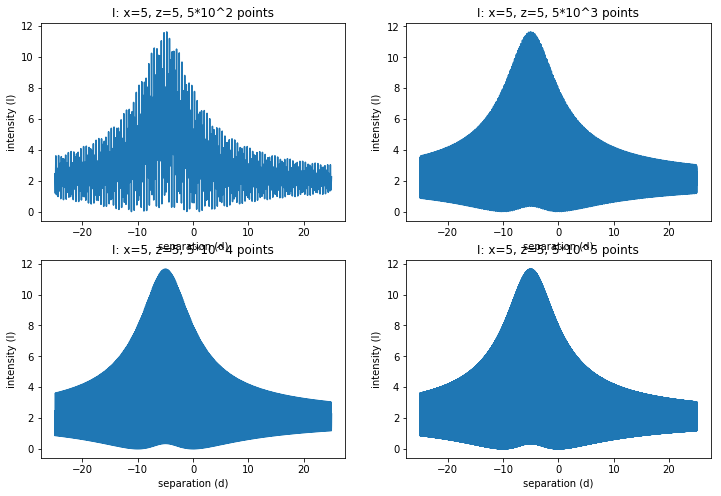

In [48]:
# 5.3.2 Finding the fringes
# Note: increasing x makes the plots spread out
#       increasing z makes the plots asymmetrical (towards left)

def waves(points, span=25, x0=5, z0=5):
    X0 = x0
    Z0 = z0
    I0 = 100
    PI = np.pi
    LAMBDA = 632.8e-9
    POINTS = points
    D_MAX = span
    #POINTS = 500000
    #D_MAX = 25

    d = linspace(-1 * D_MAX, D_MAX, num=POINTS)
    i0 = 1/(X0**2 + Z0**2)
    i1 = 1/(X0**2 + (Z0 + d)**2)
    i2 = 2/np.sqrt((X0**2 + Z0**2)*(X0**2 + (Z0 + d)**2))

    i = I0 * (i0 + i1 + i2 * np.cos(2*PI*d/LAMBDA))
    return (d, i)

def waves_x(points, span=25, d0=5, z0=5):
    d = d0
    Z0 = z0
    I0 = 100
    PI = np.pi
    LAMBDA = 632.8e-9
    POINTS = points
    D_MAX = span
    #POINTS = 500000
    #D_MAX = 25

    X0 = linspace(-1 * D_MAX, D_MAX, num=POINTS)
    i0 = 1/(X0**2 + Z0**2)
    i1 = 1/(X0**2 + (Z0 + d)**2)
    i2 = 2/np.sqrt((X0**2 + Z0**2)*(X0**2 + (Z0 + d)**2))

    i = I0 * (i0 + i1 + i2 * np.cos(2*PI*d/LAMBDA))
    return (X0, i)

def waves_z(points, span=25, d0=5, x0=5):
    X0 = x0
    d = d0
    I0 = 100
    PI = np.pi
    LAMBDA = 632.8e-9
    POINTS = points
    D_MAX = span
    #POINTS = 500000
    #D_MAX = 25

    Z0 = linspace(-1 * D_MAX, D_MAX, num=POINTS)
    i0 = 1/(X0**2 + Z0**2)
    i1 = 1/(X0**2 + (Z0 + d)**2)
    i2 = 2/np.sqrt((X0**2 + Z0**2)*(X0**2 + (Z0 + d)**2))

    i = I0 * (i0 + i1 + i2 * np.cos(2*PI*d/LAMBDA))
    return (Z0, i)

fig = plt.figure(figsize=(12,8))

# point_len = 4
# x_len = 3
# for i in range(point_len):
#     for j in range(x_len):
#         d, I = waves(10**(i+2), 25, x0=10**x_len)
#         sub = fig.add_subplot(point_len, x_len, i*x_len+j+1)
#         sub.plot(d, I)

size = 4
for i in range(size):
    d, I = waves(10**(i+2)*5+10, span=25)
    sub = fig.add_subplot(size/2, size/2, i+1)
    sub.set_xlabel("separation (d)")
    sub.set_ylabel("intensity (I)")
    sub.set_title("I: x=5, z=5, 5*10^{} points".format(i+2))
    sub.plot(d,I)
fig.show()

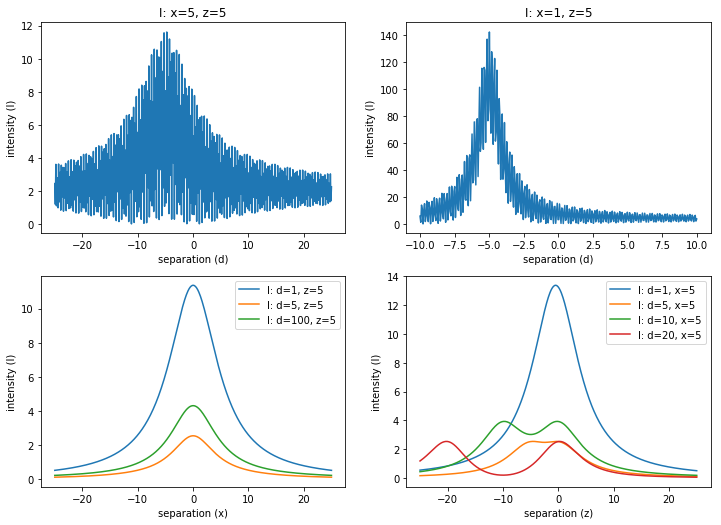

In [62]:
SUBPLOT_SIZE = 2
fig = plt.figure(figsize=(12,6))
fig.tight_layout()
plt.subplots_adjust(top=1.2)

d, I = waves(510, span=25)
sub = fig.add_subplot(SUBPLOT_SIZE, SUBPLOT_SIZE, 1)
sub.set_xlabel("separation (d)")
sub.set_ylabel("intensity (I)")
sub.set_title("I: x=5, z=5")
sub.plot(d,I)

d, I = waves(368, span=10, x0=1, z0=5)
sub = fig.add_subplot(SUBPLOT_SIZE, SUBPLOT_SIZE, 2)
sub.set_xlabel("separation (d)")
sub.set_ylabel("intensity (I)")
sub.set_title("I: x=1, z=5")
sub.plot(d,I)

sub = fig.add_subplot(SUBPLOT_SIZE, SUBPLOT_SIZE, 3)
sub.set_xlabel("separation (x)")
sub.set_ylabel("intensity (I)")
x, I = waves_x(510, d0=1)
sub.plot(x,I,label="I: d=1, z=5")
x, I = waves_x(510)
sub.plot(x,I,label="I: d=5, z=5")
x, I = waves_x(510, d0=100)
sub.plot(x,I,label="I: d=100, z=5")
#x, I = waves_x(510, d0=1, z0=7)
#sub.plot(x,I,label="I: d=1, z=7")
sub.legend()

sub = fig.add_subplot(SUBPLOT_SIZE, SUBPLOT_SIZE, 4)
sub.set_xlabel("separation (z)")
sub.set_ylabel("intensity (I)")
x, I = waves_z(510, d0=1)
sub.plot(x,I,label="I: d=1, x=5")
x, I = waves_z(510, d0=5)
sub.plot(x,I,label="I: d=5, x=5")
x, I = waves_z(510, d0=10)
sub.plot(x,I,label="I: d=10, x=5")
x, I = waves_z(510, d0=20)
sub.plot(x,I,label="I: d=20, x=5")
sub.legend()



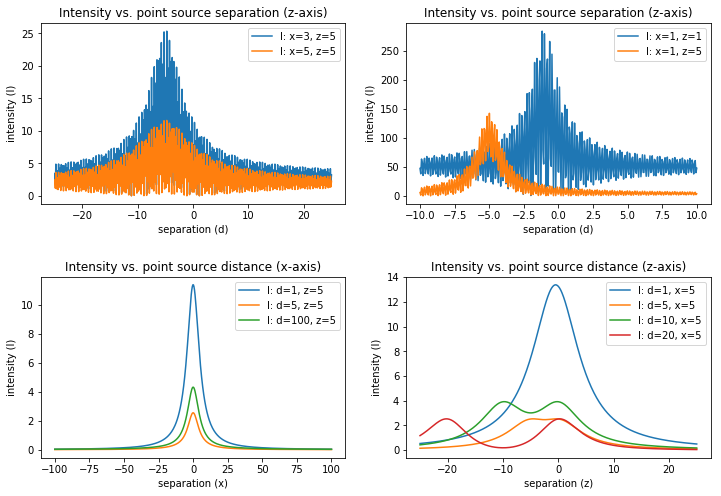

In [80]:
# 5.3.2 Finding the fringes
# Note: increasing x makes the plots spread out
#       increasing z makes the plots asymmetrical (towards left)

def waves(points, span=25, x0=5, z0=5):
    X0 = x0
    Z0 = z0
    I0 = 100
    PI = np.pi
    LAMBDA = 632.8e-9
    POINTS = points
    D_MAX = span
    #POINTS = 500000
    #D_MAX = 25

    d = linspace(-1 * D_MAX, D_MAX, num=POINTS)
    i0 = 1/(X0**2 + Z0**2)
    i1 = 1/(X0**2 + (Z0 + d)**2)
    i2 = 2/np.sqrt((X0**2 + Z0**2)*(X0**2 + (Z0 + d)**2))

    i = I0 * (i0 + i1 + i2 * np.cos(2*PI*d/LAMBDA))
    return (d, i)

def waves_x(points, span=25, d0=5, z0=5):
    d = d0
    Z0 = z0
    I0 = 100
    PI = np.pi
    LAMBDA = 632.8e-9
    POINTS = points
    D_MAX = span
    #POINTS = 500000
    #D_MAX = 25

    X0 = linspace(-1 * D_MAX, D_MAX, num=POINTS)
    i0 = 1/(X0**2 + Z0**2)
    i1 = 1/(X0**2 + (Z0 + d)**2)
    i2 = 2/np.sqrt((X0**2 + Z0**2)*(X0**2 + (Z0 + d)**2))

    i = I0 * (i0 + i1 + i2 * np.cos(2*PI*d/LAMBDA))
    return (X0, i)

def waves_z(points, span=25, d0=5, x0=5):
    X0 = x0
    d = d0
    I0 = 100
    PI = np.pi
    LAMBDA = 632.8e-9
    POINTS = points
    D_MAX = span
    #POINTS = 500000
    #D_MAX = 25

    Z0 = linspace(-1 * D_MAX, D_MAX, num=POINTS)
    i0 = 1/(X0**2 + Z0**2)
    i1 = 1/(X0**2 + (Z0 + d)**2)
    i2 = 2/np.sqrt((X0**2 + Z0**2)*(X0**2 + (Z0 + d)**2))

    i = I0 * (i0 + i1 + i2 * np.cos(2*PI*d/LAMBDA))
    return (Z0, i)

SUBPLOT_SIZE = 2
fig = plt.figure("title",figsize=(12,8))
fig.tight_layout()
plt.subplots_adjust(hspace=0.4)

sub = fig.add_subplot(SUBPLOT_SIZE, SUBPLOT_SIZE, 1)
sub.set_xlabel("separation (d)")
sub.set_ylabel("intensity (I)")
sub.set_title("Intensity vs. point source separation (z-axis)")
d, I = waves(510, span=25, x0=3)
sub.plot(d,I,label="I: x=3, z=5")
d, I = waves(510, span=25)
sub.plot(d,I,label="I: x=5, z=5")
sub.legend()

sub = fig.add_subplot(SUBPLOT_SIZE, SUBPLOT_SIZE, 2)
sub.set_xlabel("separation (d)")
sub.set_ylabel("intensity (I)")
sub.set_title("Intensity vs. point source separation (z-axis)")
d, I = waves(368, span=10, x0=1, z0=1)
sub.plot(d,I,label="I: x=1, z=1")
d, I = waves(368, span=10, x0=1, z0=5)
sub.plot(d,I,label="I: x=1, z=5")
sub.legend()

sub = fig.add_subplot(SUBPLOT_SIZE, SUBPLOT_SIZE, 3)
sub.set_xlabel("separation (x)")
sub.set_ylabel("intensity (I)")
sub.set_title("Intensity vs. point source distance (x-axis)")
x, I = waves_x(510, span=100, d0=1)
sub.plot(x,I,label="I: d=1, z=5")
x, I = waves_x(510, span=100)
sub.plot(x,I,label="I: d=5, z=5")
x, I = waves_x(510, span=100, d0=100)
sub.plot(x,I,label="I: d=100, z=5")
sub.legend()

sub = fig.add_subplot(SUBPLOT_SIZE, SUBPLOT_SIZE, 4)
sub.set_xlabel("separation (z)")
sub.set_ylabel("intensity (I)")
sub.set_title("Intensity vs. point source distance (z-axis)")
x, I = waves_z(510, d0=1)
sub.plot(x,I,label="I: d=1, x=5")
x, I = waves_z(510, d0=5)
sub.plot(x,I,label="I: d=5, x=5")
x, I = waves_z(510, d0=10)
sub.plot(x,I,label="I: d=10, x=5")
x, I = waves_z(510, d0=20)
sub.plot(x,I,label="I: d=20, x=5")
sub.legend()
